--2019-12-21 10:50:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2019-12-21 10:50:43 (1.10 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



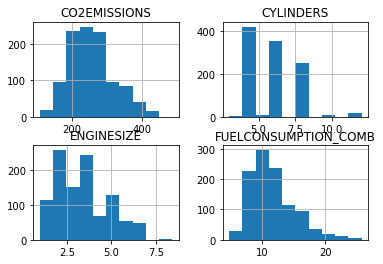

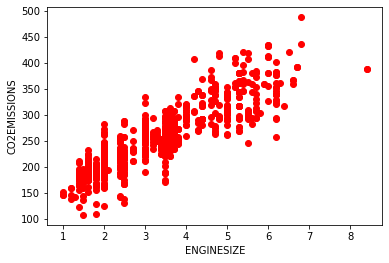

Coefficients:  [[39.15824144]]
Intercept:  [125.37696595]
Mean absolute error: 23.82
Residual sum of squares (MSE): 1017.54
r2_score: 0.69


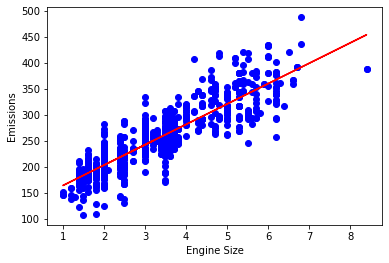

In [25]:
# We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. 
# Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value

import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

df = pd.read_csv("FuelConsumption.csv")
df.head()

# summarize the data
df.describe()

cdf = df[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS','CO2EMISSIONS']]
cdf.head(9)

#plot Features
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

#Fuel Consumption vs Emission Linear relation Plot
#plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='red')
#plt.xlabel('FUELCONSUMPTION_COMB')
#plt.ylabel('CO2EMISSIONS')
#plt.show()

#Engine Size vs Emission Linear relation Plot
#plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
#plt.xlabel('ENGINESIZE')
#plt.ylabel('CO2EMISSIONS')
#plt.show()


#Engine Size vs Emission Linear relation Plot
#plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='red')
#plt.ylabel('CO2EMISSIONS')
#plt.xlabel('CYLINDERS')
#plt.show()




#CREATING TRAIN and TEST DATASET

#Division into 2 parts
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

#train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show();

# Modeling - calculating coefficent and intercept
from sklearn import linear_model
regr = linear_model.LinearRegression()
trainX = np.asanyarray(train[['ENGINESIZE']])
trainY = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(trainX,trainY)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# PLOTTING OUTPUTS
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(trainX, regr.coef_[0][0]*trainX+regr.intercept_, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")

#Evaluation of our model
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("r2_score: %.2f" % r2_score(test_y_, test_y))

